In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data from the CSV file. Replace 'your_data.csv' with the actual file path.
data = pd.read_csv("/content/univarate(linearA).csv")

# Features (X) should include all columns except the last one, which is the target variable.
X = data.iloc[:, :-1]

# Target variable (y) should be the last column.
y = data.iloc[:, -1]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Create a DataFrame with the normalized features
normalized_data = pd.DataFrame(X_normalized, columns=X.columns)

# Display the normalized data
print(normalized_data)

# Display the target variable (y)
print(y)


           X
0   0.103604
1   0.130631
2   0.067568
3   1.000000
4   0.540541
..       ...
63  0.040541
64  0.139640
65  0.063063
66  0.238739
67  0.117117

[68 rows x 1 columns]
0      56.90
1     121.02
2      12.32
3      78.25
4     777.10
       ...  
63     87.40
64    209.80
65     95.50
66    244.60
67    187.50
Name: Y, Length: 68, dtype: float64


linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('/content/linearuniassignment.csv')  # Replace with your actual file path
data.head()


,x,y
0,1.5,3.6
1,2.0,4.0
2,2.5,5.0
3,3.0,6.0


linear regression for gd,hypothesis,cost function


Mean Squared Error: 0.07
R-squared: 0.92


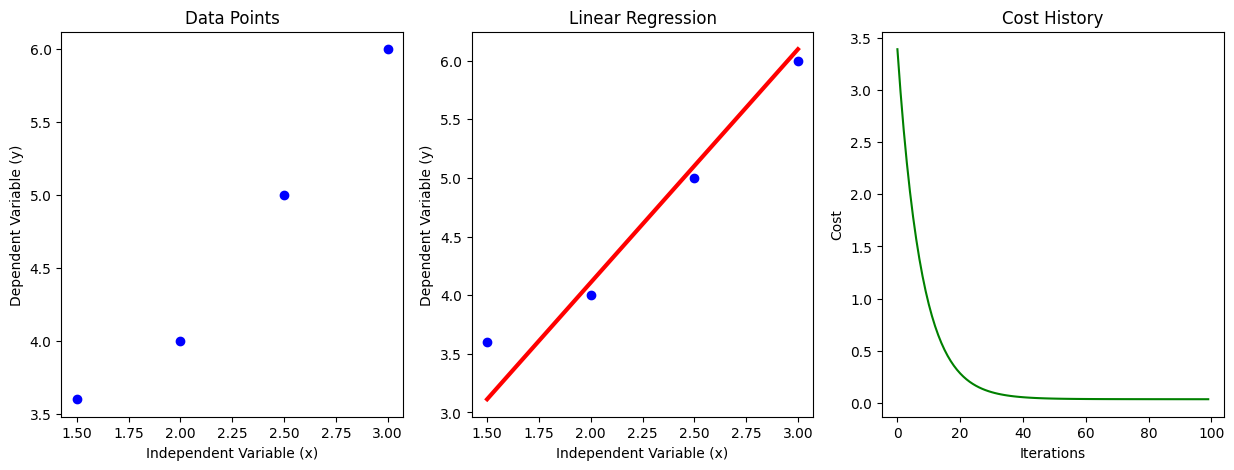

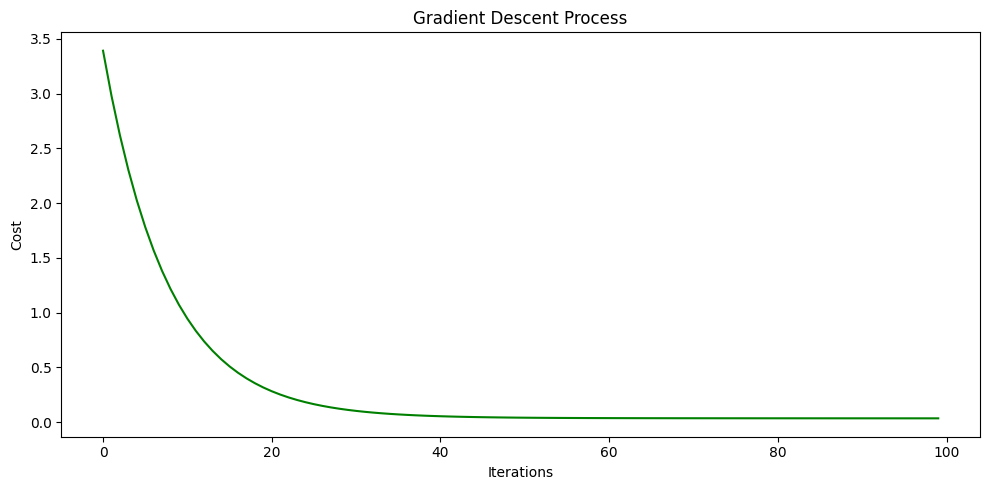

In [3]:
# Extract independent and dependent variables from the dataset
X = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

# Define the number of iterations and learning rate for gradient descent
num_iterations = 100
learning_rate = 0.01

# Initialize the parameters (theta0 and theta1)
theta0 = np.random.randn()
theta1 = np.random.randn()

# Lists to store the cost history for visualization
cost_history = []

# Hypothesis function (linear model)
def hypothesis(theta0, theta1, X):
    return theta0 + theta1 * X

# Cost function (mean squared error)
def cost_function(theta0, theta1, X, y):
    m = len(y)
    h = hypothesis(theta0, theta1, X)
    return (1 / (2 * m)) * np.sum((h - y)**2)

# Gradient Descent function
def gradient_descent(theta0, theta1, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta0, theta1, X)
        gradient_theta0 = (1 / m) * np.sum(h - y)
        gradient_theta1 = (1 / m) * np.sum((h - y) * X)
        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1
        cost = cost_function(theta0, theta1, X, y)
        cost_history.append(cost)
    return theta0, theta1

# Perform gradient descent to find the optimal parameters
theta0, theta1 = gradient_descent(theta0, theta1, X, y, learning_rate, num_iterations)

# Model evaluation
y_pred = hypothesis(theta0, theta1, X)
mse = np.mean((y_pred - y)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data, hypothesis line, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Data Points')

# Plot the hypothesis line
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

# Plot the gradient descent process
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Process')

plt.tight_layout()
plt.show()



polynomial linear regression

Mean Squared Error: 1.08
R-squared: 0.72


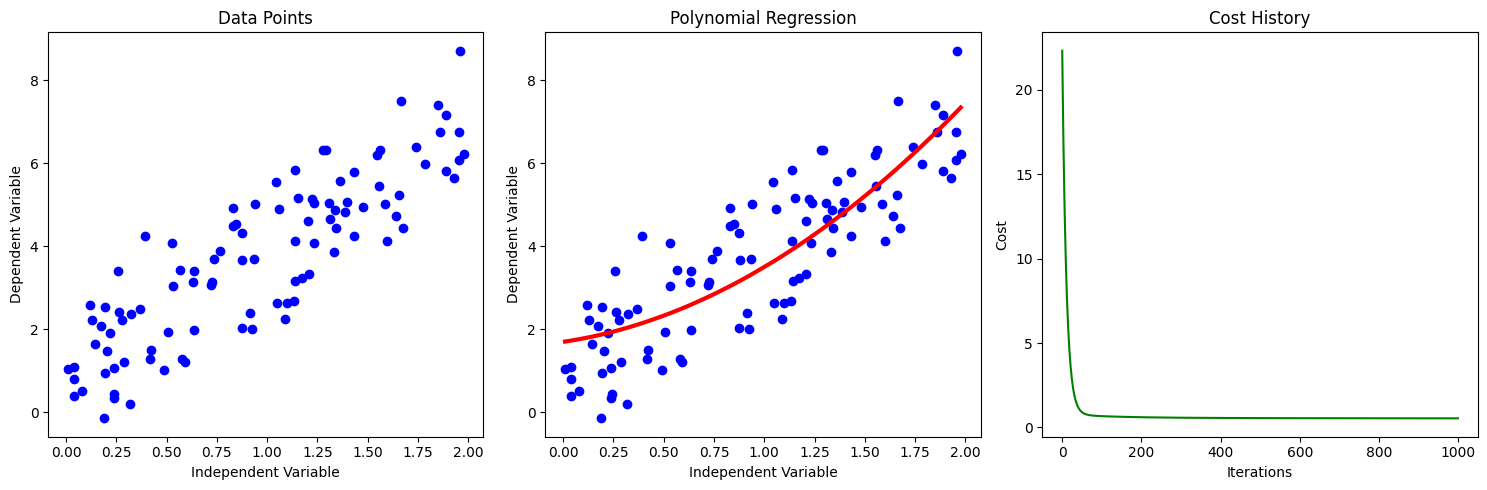

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Independent variable
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)  # Polynomial dependent variable with noise

# Define the number of iterations and learning rate for gradient descent
num_iterations = 1000
learning_rate = 0.01

# Initialize the parameters (theta0, theta1, and theta2 for quadratic regression)
theta0 = np.random.randn()
theta1 = np.random.randn()
theta2 = np.random.randn()

# Lists to store the cost history for visualization
cost_history = []

# Hypothesis function (quadratic model)
def hypothesis(theta0, theta1, theta2, X):
    return theta0 + theta1 * X + theta2 * X**2

# Cost function (mean squared error)
def cost_function(theta0, theta1, theta2, X, y):
    m = len(y)
    h = hypothesis(theta0, theta1, theta2, X)
    return (1 / (2 * m)) * np.sum((h - y)**2)

# Gradient Descent function
def gradient_descent(theta0, theta1, theta2, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta0, theta1, theta2, X)
        gradient_theta0 = (1 / m) * np.sum(h - y)
        gradient_theta1 = (1 / m) * np.sum((h - y) * X)
        gradient_theta2 = (1 / m) * np.sum((h - y) * X**2)
        theta0 -= learning_rate * gradient_theta0
        theta1 -= learning_rate * gradient_theta1
        theta2 -= learning_rate * gradient_theta2
        cost = cost_function(theta0, theta1, theta2, X, y)
        cost_history.append(cost)
    return theta0, theta1, theta2

# Perform gradient descent to find the optimal parameters
theta0, theta1, theta2 = gradient_descent(theta0, theta1, theta2, X, y, learning_rate, num_iterations)

# Model evaluation
y_pred = hypothesis(theta0, theta1, theta2, X)
mse = np.mean((y_pred - y)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Sort X and y_pred for plotting
X_plot, y_pred_plot = zip(*sorted(zip(X, y_pred)))

# Plot the original data, hypothesis curve, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Data Points')

# Plot the hypothesis curve
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue')
plt.plot(X_plot, y_pred_plot, color='red', linewidth=3)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Polynomial Regression')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.tight_layout()
plt.show()



multivariate linear regression

Mean Squared Error: 0.29
R-squared: 0.63


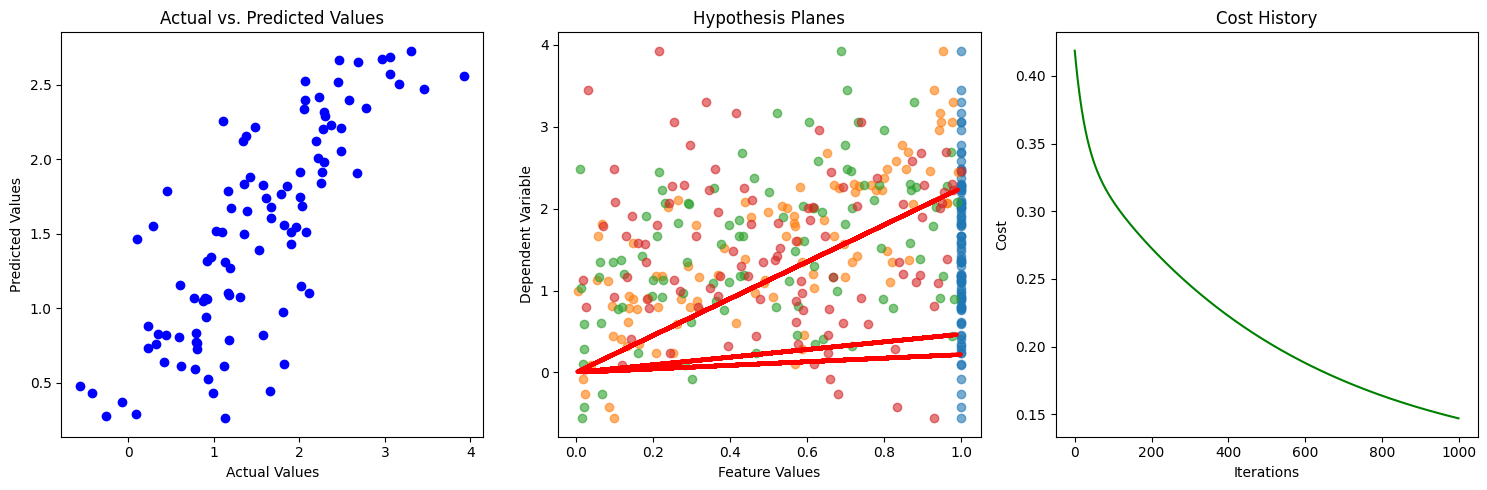

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic multivariate data for demonstration
np.random.seed(0)
n_samples = 100
n_features = 3  # Number of features
X = np.random.rand(n_samples, n_features)  # Independent variables
true_theta = np.array([2.5, 1.2, -0.5])  # True coefficients
noise = 0.5 * np.random.randn(n_samples)  # Random noise
y = np.dot(X, true_theta) + noise  # Dependent variable

# Add a column of ones for the bias term (intercept)
X_b = np.c_[np.ones((n_samples, 1)), X]

# Define the number of iterations and learning rate for gradient descent
num_iterations = 1000
learning_rate = 0.01

# Initialize the parameters (theta0, theta1, theta2, ..., theta_n)
theta = np.random.randn(n_features + 1)

# List to store the cost history for visualization
cost_history = []

# Hypothesis function (linear model)
def hypothesis(theta, X):
    return np.dot(X, theta)

# Cost function (mean squared error)
def cost_function(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return (1 / (2 * m)) * np.sum((h - y)**2)

# Gradient Descent function
def gradient_descent(theta, X, y, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = hypothesis(theta, X)
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)
    return theta

# Perform gradient descent to find the optimal parameters
theta = gradient_descent(theta, X_b, y, learning_rate, num_iterations)

# Model evaluation
y_pred = hypothesis(theta, X_b)
mse = np.mean((y_pred - y)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data, hypothesis plane, and cost history
plt.figure(figsize=(15, 5))

# Plot the data points
plt.subplot(1, 3, 1)
plt.scatter(y, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the hypothesis plane (for each feature)
plt.subplot(1, 3, 2)
for feature_index in range(n_features + 1):
    plt.scatter(X_b[:, feature_index], y, label=f'Feature {feature_index}', alpha=0.6)
    plt.plot(X_b[:, feature_index], X_b[:, feature_index] * theta[feature_index], color='red', linewidth=3)
plt.xlabel('Feature Values')
plt.ylabel('Dependent Variable')
plt.title('Hypothesis Planes')

# Plot the cost history
plt.subplot(1, 3, 3)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')

plt.tight_layout()
plt.show()
